In [1]:
import numpy as np
from scipy.stats import vonmises
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import i0, i1
matplotlib.rcParams.update({'font.size': 14,
                            'pdf.fonttype': 42,
                            'ps.fonttype': 42})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

## Figure 2a - Population activity

In [2]:
### tuning curve parameters
def f(phi_i,phi,g):
    return g * np.exp(w * np.cos(phi-phi_i))
g = 1
w = 1

### neural population
N = 8
phi_axis = np.linspace(-np.pi,np.pi,100)
neuron_axis = np.linspace(-np.pi,np.pi-2*np.pi/N,N)

### colors for plots
cmap_neuron = matplotlib.cm.get_cmap('hsv')
col_neuron = (neuron_axis + np.pi)/(2*np.pi)

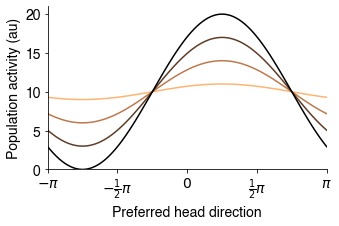

In [3]:
### Population tuning curve
kappa = np.array([1,4,7,10])
cmap = matplotlib.cm.get_cmap('copper')
col = 1-kappa/10

mu = np.pi/4
def f(phi_i,mu,kappa):
    return kappa * np.cos(phi_i-mu) + 10

fig, ax = plt.subplots(1,1,figsize=(5,3))
for i in range(len(kappa)):
    ax.plot(phi_axis,f(phi_axis,mu,kappa[i]),color=cmap(col[i]),zorder=1,linewidth=1.5)
ax.set_xticks([0., -np.pi/2, np.pi/2, - np.pi, np.pi])
ax.set_xticklabels(["$0$", r"$-\frac{1}{2}\pi$",r"$\frac{1}{2}\pi$",r"$-\pi$",r"$\pi$"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([0,21]) 
ax.set_xlabel('Preferred head direction')
ax.set_ylabel('Population activity (au)')
plt.show()

## Figure 2c - von Mises PDF

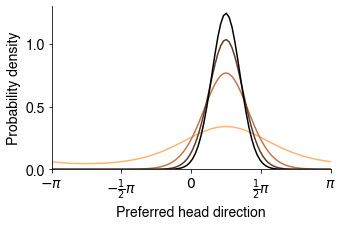

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
for i in range(len(kappa)):
    ax.plot(phi_axis,vonmises.pdf(phi_axis,kappa[i],loc=mu),color=cmap(col[i]))
ax.set_xticks([0., -np.pi/2, np.pi/2, - np.pi, np.pi])
ax.set_xticklabels(["$0$", r"$-\frac{1}{2}\pi$",
                     r"$\frac{1}{2}\pi$",r"$-\pi$",r"$\pi$"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('Preferred head direction')
ax.set_ylabel('Probability density')
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([0,1.3]) 
plt.show()

 ## Figure S1a & S1b - Tuning curves with respect to encoded HD estimate

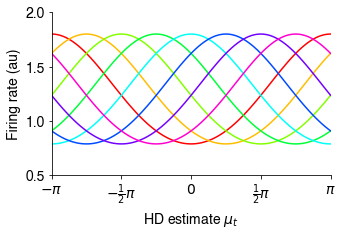

In [5]:
# tuning curve parameters
def f(phi_i,mu,kappa):
    kappa_tilde = np.sqrt( w**2 + kappa**2 + 2 * w * kappa * np.cos(phi_i-mu) )
    return kappa * i0(kappa_tilde)/i0(kappa)
kappa = 1 # small kappa
w = 1 


fig, ax = plt.subplots(1,1,figsize=(5,3))
for phi_i in neuron_axis:
    col = (phi_i + np.pi)/(2*np.pi)
    ax.plot(phi_axis,f(phi_i,phi_axis,kappa),color=cmap_neuron(col))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks([0., -np.pi/2, np.pi/2, - np.pi, np.pi])
ax.set_xticklabels(["$0$", r"$-\frac{1}{2}\pi$", r"$\frac{1}{2}\pi$",r"$-\pi$",r"$\pi$"])
ax.set_xlabel(r'HD estimate $\mu_t$')
ax.set_ylabel('Firing rate (au)')
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([0.5,2]) 
plt.show()

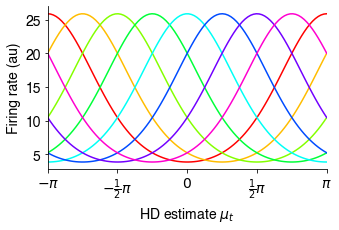

In [6]:
# tuning curve parameters
def f(phi_i,mu,kappa):
    kappa_tilde = np.sqrt( w**2 + kappa**2 + 2 * w * kappa * np.cos(phi_i-mu) )
    return kappa * i0(kappa_tilde)/i0(kappa)
kappa = 10 # large kappa
w = 1 


fig, ax = plt.subplots(1,1,figsize=(5,3))
for phi_i in neuron_axis:
    col = (phi_i + np.pi)/(2*np.pi)
    ax.plot(phi_axis,f(phi_i,phi_axis,kappa),color=cmap_neuron(col))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks([0., -np.pi/2, np.pi/2, - np.pi, np.pi])
ax.set_xticklabels(["$0$", r"$-\frac{1}{2}\pi$", r"$\frac{1}{2}\pi$",r"$-\pi$",r"$\pi$"])
ax.set_xlabel(r'HD estimate $\mu_t$')
ax.set_ylabel('Firing rate (au)')
ax.set_xlim([-np.pi,np.pi])
plt.show()

## Figure S1f - Amplitude of profile

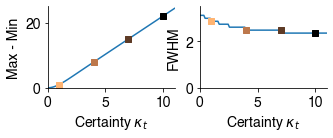

In [7]:
def determine_features(kappa):
    "Computes height and width of the activity profile peak."
    height = kappa/i0(kappa) * ( i0(w+kappa) - i0(np.abs(w-kappa)) )
    kappa_tilde = np.sqrt( w**2 + kappa**2 + 2 * w * kappa * np.cos(phi_axis) )
    profile = kappa/i0(kappa) * (i0(kappa_tilde) - i0(np.abs(w-kappa)) )
    idx = find_nearest(profile,height/2+np.min(profile))
    width = 2 * np.abs(phi_axis[idx])
    return height, width

def find_nearest(array, value):
    " Helper that finds the index of the entry in array that is nearest to value "
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


kappa = np.array([1,4,7,10])
cmap = matplotlib.cm.get_cmap('copper')
col = 1-kappa/10
kappa_axis = np.linspace(0.01,11,100)

### computes height and width for different values of kappa
height = np.zeros(len(kappa_axis))
width = np.zeros(len(kappa_axis))
for i in range(len(kappa_axis)):
    height[i],width[i] = determine_features(kappa_axis[i])


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5,1.5))
for i in range(len(kappa)):
    ax1.scatter(kappa[i],determine_features(kappa[i])[0],color=cmap(col[i]),zorder=2,marker='s')
ax1.plot(kappa_axis,height,zorder=1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xlabel(r'Certainty $\kappa_t$')
ax1.set_ylabel('Max - Min')
ax1.set_xlim([0,11])
ax1.set_ylim([0,25])

ax2.plot(kappa_axis,width,zorder=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_ylim([0,3.5])
ax2.set_xlim([0,11])
for i in range(len(kappa)):
    ax2.scatter(kappa[i],determine_features(kappa[i])[1],color=cmap(col[i]),zorder=2,marker='s')
ax2.set_xlabel(r'Certainty $\kappa_t$')
ax2.set_ylabel('FWHM')

plt.show()

## Figure S1g, S1h, S1i - Amplitudes of Fourier components

In [8]:
def CosFourier(f,k):
    # returns amplitudes of even Fourier components of function f up to order k
    axis = np.linspace(-np.pi,np.pi,10000)
    dx = 2*np.pi/10000
    c = np.zeros(k+1)
    c[0] = 1/(2*np.pi) * np.sum(f(axis)) * dx
    for n in np.arange(1,k+1):
        c[n] = 1/np.pi * np.sum( f(axis) * np.cos(n*axis) ) * dx
    return c

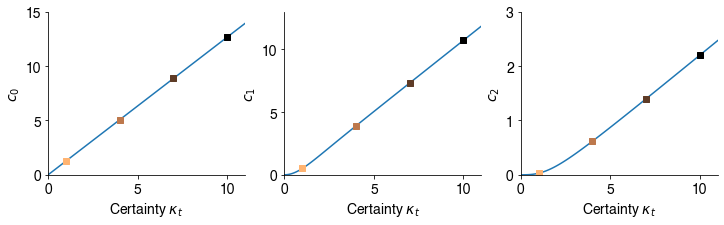

In [9]:
# Population tuning curve
w = 1
col_neuron = (neuron_axis + np.pi)/(2*np.pi)
kappa = np.array([1,4,7,10])
cmap = matplotlib.cm.get_cmap('copper')
col = 1-kappa/10
def f(phi_i,mu,kappa):
    kappa_tilde = np.sqrt( w**2 + kappa**2 + 2 * w * kappa * np.cos(phi_i-mu) )
    return kappa * i0(kappa_tilde)/i0(kappa)

kappa_axis = np.linspace(0.01,11,100)
phi_axis = np.linspace(-np.pi,np.pi,1000)


fc = np.zeros([len(kappa_axis),4])
for i in np.arange(len(kappa_axis)):
    fc[i] = CosFourier(lambda x: f(x,0,kappa_axis[i]),3)


fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(12,3))
ax1.plot(kappa_axis,fc[:,0],zorder=1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xlim([0,11])
ax1.set_ylim([0,15])
ax1.set_xlabel(r'Certainty $\kappa_t$')
ax1.set_ylabel(r'$c_0$')
for i in range(len(kappa)):
    ax1.scatter(kappa[i],CosFourier(lambda x: f(x,0,kappa[i]),3)[0],color=cmap(col[i]),zorder=2,marker='s')

ax2.plot(kappa_axis,fc[:,1],zorder=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xlim([0,11])
ax2.set_ylim([0,13])
ax2.set_xlabel(r'Certainty $\kappa_t$')
ax2.set_ylabel(r'$c_1$')
for i in range(len(kappa)):
    ax2.scatter(kappa[i],CosFourier(lambda x: f(x,0,kappa[i]),3)[1],color=cmap(col[i]),zorder=2,marker='s')

ax3.plot(kappa_axis,fc[:,2],zorder=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_xlim([0,11])
ax3.set_ylim([0,3])
ax3.set_xlabel(r'Certainty $\kappa_t$')
ax3.set_ylabel(r'$c_2$')
for i in range(len(kappa)):
    ax3.scatter(kappa[i],CosFourier(lambda x: f(x,0,kappa[i]),3)[2],color=cmap(col[i]),zorder=2,marker='s')


plt.show()